In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
if not os.path.exists('celeba_dataset.csv'):
    img_path='CelebA/images'
    identity_path='CelebA/attributes/identity_CelebA.txt'
    attr_path='CelebA/attributes/list_attr_celeba.txt'
    bbox_path='CelebA/attributes/list_bbox_celeba.txt'
    landmarks_path='CelebA/attributes/list_landmarks_align_celeba.txt'


    # Loading datasets
    df_attr = pd.read_csv(attr_path, delim_whitespace=True, header=0)
    df_identity = pd.read_csv(identity_path, delim_whitespace=True, header=0)
    df_bbox = pd.read_csv(bbox_path, delim_whitespace=True, header=0)
    df_landmarks = pd.read_csv(landmarks_path, delim_whitespace=True, header=0)

    # Converting -1 to 0
    attr_columns = [col for col in df_attr.columns if col != 'image_id']
    for col in attr_columns:
        df_attr[col] = df_attr[col].replace(-1, 0)


    # Merging all datasets
    df = df_attr.copy()
    df = df.merge(df_identity, on='image_id', how='left')
    df = df.merge(df_bbox, on='image_id', how='left')
    df = df.merge(df_landmarks, on='image_id', how='left')

    # Adding image path attribute
    df['image_path'] = df['image_id'].apply(lambda x: os.path.join(img_path, x))

    # Saving to csv file
    output_csv = 'celeba_dataset.csv'
    df.to_csv(output_csv, index=False)

In [21]:
df = pd.read_csv('celeba_dataset.csv', sep=None, engine='python');

In [22]:
def show_image_info(data, image_id):
    # Finding row
    img_row = data[data["image_id"] == image_id]
    img_path = img_row["image_path"].iloc[0]

    # Loading image
    img = Image.open(img_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_id)
    plt.show()

    # Attributes
    attrs = img_row.T
    attrs.columns = ["value"]
    print("Attributes:")
    display(attrs)


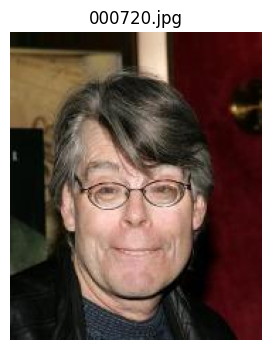

Attributes:


,value
image_id,000720.jpg
5_o_Clock_Shadow,0
Arched_Eyebrows,0
Attractive,0
Bags_Under_Eyes,0
Bald,0
Bangs,0
Big_Lips,0
Big_Nose,0
Black_Hair,0


In [23]:
show_image_info(df, "000720.jpg")

In [24]:
print(f"Number of records (rows): {df.shape[0]}")
print(f"Number of attributes (columns): {df.shape[1]}")

Number of records (rows): 202599
Number of attributes (columns): 57


In [25]:
df.dtypes

image_id               object
5_o_Clock_Shadow        int64
Arched_Eyebrows         int64
Attractive              int64
Bags_Under_Eyes         int64
Bald                    int64
Bangs                   int64
Big_Lips                int64
Big_Nose                int64
Black_Hair              int64
Blond_Hair              int64
Blurry                  int64
Brown_Hair              int64
Bushy_Eyebrows          int64
Chubby                  int64
Double_Chin             int64
Eyeglasses              int64
Goatee                  int64
Gray_Hair               int64
Heavy_Makeup            int64
High_Cheekbones         int64
Male                    int64
Mouth_Slightly_Open     int64
Mustache                int64
Narrow_Eyes             int64
No_Beard                int64
Oval_Face               int64
Pale_Skin               int64
Pointy_Nose             int64
Receding_Hairline       int64
Rosy_Cheeks             int64
Sideburns               int64
Smiling                 int64
Straight_H

In [26]:
df.isna().sum()

image_id               0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0


In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df.columns.tolist()

['image_id',
 '5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young',
 'person_id',
 'x_1',
 'y_1',
 'width',
 'height',
 'lefteye_x',
 'lefteye_y',
 'righteye_x',
 'righteye_y',
 'nose_x',
 'nose_y',
 'leftmouth_x',
 'leftmouth_y',
 'rightmouth_x',
 'rightmouth_y',
 'image_path']

In [29]:
if not os.path.exists('CelebA/images_cropped'):
    for row in df.itertuples():
        img_path = row.image_path
        img = Image.open(img_path)

        # Cropping to 178x178
        img_cropped = img.crop((0, 20, 178, 198))

        # Resizing to 128x128
        img_resized = img_cropped.resize((128, 128), Image.BICUBIC)

        # Saving to folder
        save_path = os.path.join('CelebA/images_cropped', row.image_id)
        img_resized.save(save_path)

In [30]:
df = df[['Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Mustache', 'No_Beard', 'Big_Lips', 'Big_Nose', 'Chubby', 'Narrow_Eyes', 'Male', 'Young', 'Eyeglasses', 'Heavy_Makeup', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'image_path']]

if not os.path.exists('celeba_reduced.csv'):
    # Saving to csv file
    output_csv = 'celeba_reduced.csv'
    df.to_csv(output_csv, index=False)